## 1. Setup and Load Data

#### 1.1 Install Dependencies and Setup

##### 1.1.1 Imports

In [5]:
import tensorflow as tf
import os

from matplotlib import pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix

import seaborn as sns


In [ ]:
# List all directorys in out dataset folder
os.listdir("dataset")

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

#### 1.2 Remove dodgy images

In [4]:
import cv2

In [5]:
img = cv2.imread(os.path.join('dataset', 'administration', 'IMG_1479.jpg'))

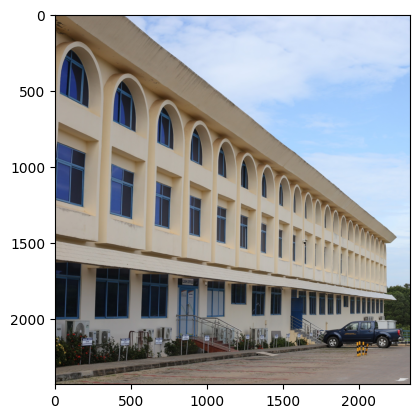

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#### 1.3 Load Data

In [7]:
# Run Dataset into memory
dataset = tf.keras.utils.image_dataset_from_directory('dataset')

Found 969 files belonging to 9 classes.


In [8]:
dataset_iterator = dataset.as_numpy_iterator()

In [9]:
# get another batch from the iterator
batch = dataset_iterator.next()

In [10]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

### 2. Preprocessing Data

##### 2.1 Scale Data

In [11]:
# scale down data in dataset pipline
dataset = dataset.map(lambda x, y: (x/255, y) )

In [12]:
scaled_interator = dataset.as_numpy_iterator()

In [13]:
# get another batch from the iterator
batch = scaled_interator.next()

In [14]:
batch[0].max()

1.0

In [15]:
batch[1]

array([8, 1, 3, 5, 5, 2, 2, 5, 8, 0, 8, 7, 7, 8, 5, 5, 7, 0, 2, 5, 1, 6,
       8, 8, 5, 1, 7, 7, 8, 0, 5, 6])

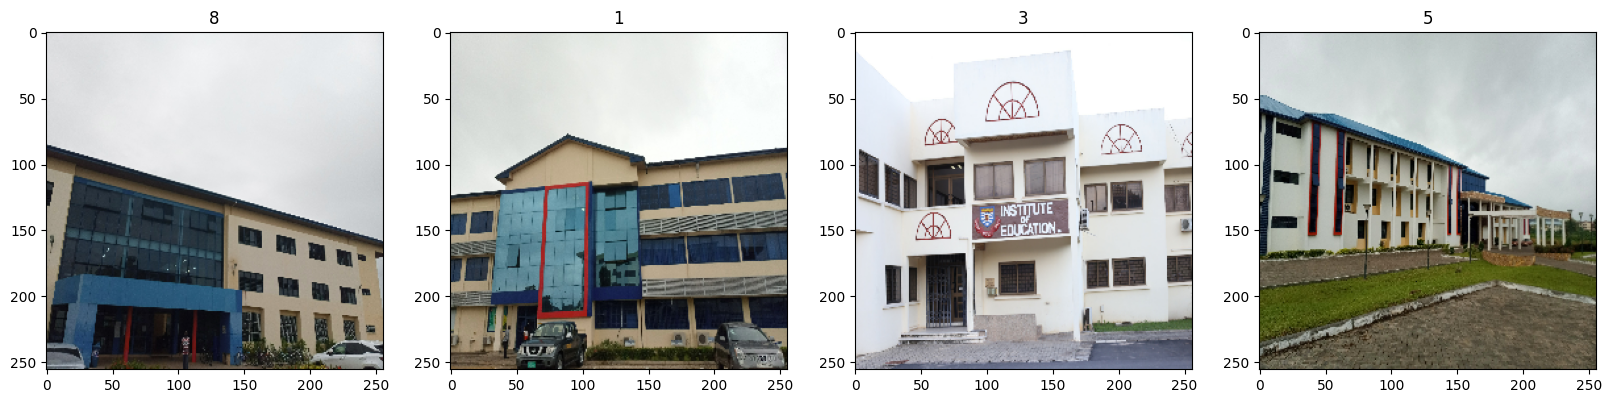

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
"""
    CLASS 0 = Administration
    ----------------------------------------CLASS 1 = Amissah Arthur
    CLASS 1 = School of Bussiness
    ----------------------------------------CLASS 3 = CALC
    CLASS 2 = CODE
    -------------------------------------------CLASS 5 = College of Education and MIS
    CLASS 3 = Educational Institution
    CLASS 4 = Engineering block
    -------------------------------CLASS 8 = G-Block
    CLASS 5 = Graduate Studies
    ----------------------------------------------CLASS 9 = NEC
    ------------------------------------------CLASS 11 = NEC
    CLASS 6 = NLT
    CLASS 7 = Sam Jonah
    -------------------------------------------CLASS 14 = Science building
    -------------------------------------------CLASS  = Shuttle Stop/Station
    CLASS 8 = SWLT- Shata Wale
"""

##### 2.2 Split Data

In [17]:
# total number of batches with 32 images in each batch
len(dataset)

31

In [18]:
train_size = int(len(dataset) * .7)
val_size = int(len(dataset) * .2)
test_size = int(len(dataset) * .1)+1

In [19]:
train_size + val_size + test_size

31

In [21]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size + val_size).take(test_size)

### 3. Deep Model

##### 3.1 Build Deep Learning Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(9, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

##### 3.1 Train

In [625]:
logdir = 'logs'

In [626]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
# model.fit??
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [25]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[early_stopping])

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.1227 - loss: 2.7613 - val_accuracy: 0.2812 - val_loss: 2.1459
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.1955 - loss: 2.1110 - val_accuracy: 0.2656 - val_loss: 2.0112
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.2712 - loss: 1.8687 - val_accuracy: 0.4062 - val_loss: 1.7299
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.4898 - loss: 1.5453 - val_accuracy: 0.4896 - val_loss: 1.4495
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5106 - loss: 1.3085 - val_accuracy: 0.6719 - val_loss: 1.0879
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6540 - loss: 0.9573 - val_accuracy: 0.7760 - val_loss: 0.8195
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7240 - loss: 0.7831 - val_accuracy: 0.7812 - val_loss: 0.6502
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8434 - loss: 0.4360 - val_accuracy: 0.9115 - val_loss:

##### 3.1 Plot Performance

##### Loss graph

In [ ]:
hist.history

In [ ]:
loss_graph = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

loss_graph.suptitle("Loss", fontsize=20)
plt.legend(loc='upper left')
plt.show()

##### Accuracy graph

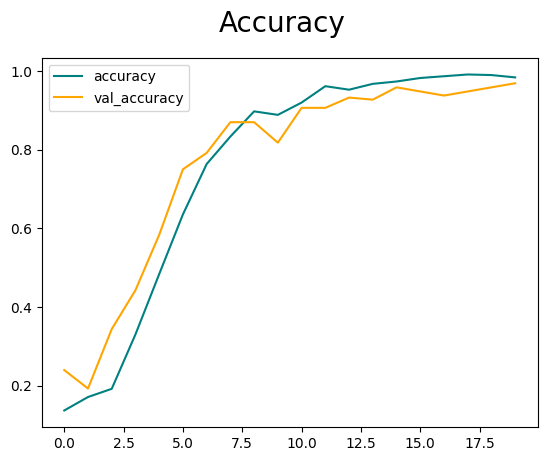

In [44]:
accuracy_graph = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

accuracy_graph.suptitle("Accuracy", fontsize=20)
plt.legend(loc='upper left')
plt.show()

##### confusion matrix

### 4. Evaluate Performance


##### 4.1 Evaluate

In [45]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [46]:
precision = Precision()
recall = Recall()
acc = SparseCategoricalAccuracy()

# Define the number of classes in your classification problem
num_classes = 9  # Set this to your actual number of classes

# Collect all true labels and predictions
all_true_labels = []
all_predicted_labels = []


In [48]:
# Batch counter
batch_counter = 0

# Iterate over the test dataset
for batch in test.as_numpy_iterator():
    batch_counter += 1
    X, y = batch
    yhat = model.predict(X)
    y = tf.convert_to_tensor(y, dtype=tf.int32)
    yhat = tf.convert_to_tensor(yhat, dtype=tf.float32)
    
    # Ensure yhat is in the correct shape and is a probability distribution
    if yhat.shape[-1] != num_classes:
        raise ValueError(f"Expected yhat to have shape (batch_size, {num_classes}), got {yhat.shape}")
    if not tf.reduce_all(tf.equal(tf.reduce_sum(yhat, axis=-1), 1.0)):
        yhat = tf.nn.softmax(yhat)
    
    # Get the predicted class
    yhat_classes = tf.argmax(yhat, axis=1)
    
    # Print debug information for a few batches
    print(f"True labels:       {y.numpy()}")
    print(f"Predicted classes: {yhat_classes.numpy()}")
    
    # Update the metrics
    precision.update_state(y_true=y, y_pred=yhat_classes)
    recall.update_state(y_true=y, y_pred=yhat_classes)
    acc.update_state(y_true=y, y_pred=yhat_classes)


    # Collect the true labels and predictions
    all_true_labels.extend(y.numpy())
    all_predicted_labels.extend(yhat_classes.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
True labels:       [3 0 0 0 6 6 5 7 1 5 8 3 4 7 1 6 0 7 7 8 8 6 4 5 7 6 5 8 8 7 1 6]
Predicted classes: [3 0 0 0 6 6 5 7 1 5 8 3 4 7 1 6 0 7 7 1 8 6 4 5 7 6 5 8 8 7 1 6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
True labels:       [4 8 6 4 7 6 4 8 8 0 7 0 6 5 0 1 4 8 8 6 1 7 4 5 4 1 1 7 8 5 8 4]
Predicted classes: [4 8 6 4 7 6 4 8 8 0 7 0 6 5 0 1 4 8 8 6 1 7 4 5 4 1 1 7 8 5 8 4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
True labels:       [7 0 0 4 6 3 0 8 5 3 1 5 8 6 2 4 0 0 6 5 7 7 4 6 4 5 1 5 6 6 0 1]
Predicted classes: [7 0 0 8 4 3 0 8 5 3 1 5 8 6 2 4 0 0 6 5 7 7 4 6 4 4 1 5 6 6 0 1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
True labels:       [5 7 7 7 5 5 6 7 8]
Predicted classes: [5 7 7 7 5 5 4 7 8]


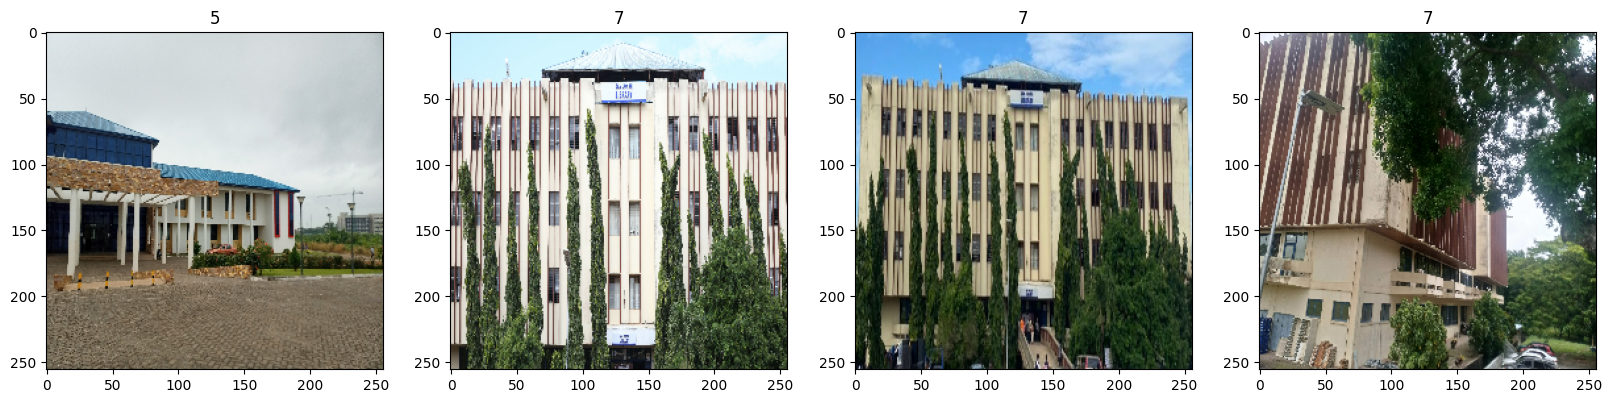

In [49]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Print the batch count
print(f'Processed {batch_counter} batches.')

print(f'Precision: {precision.result().numpy()}')
print(f'Recall: {recall.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

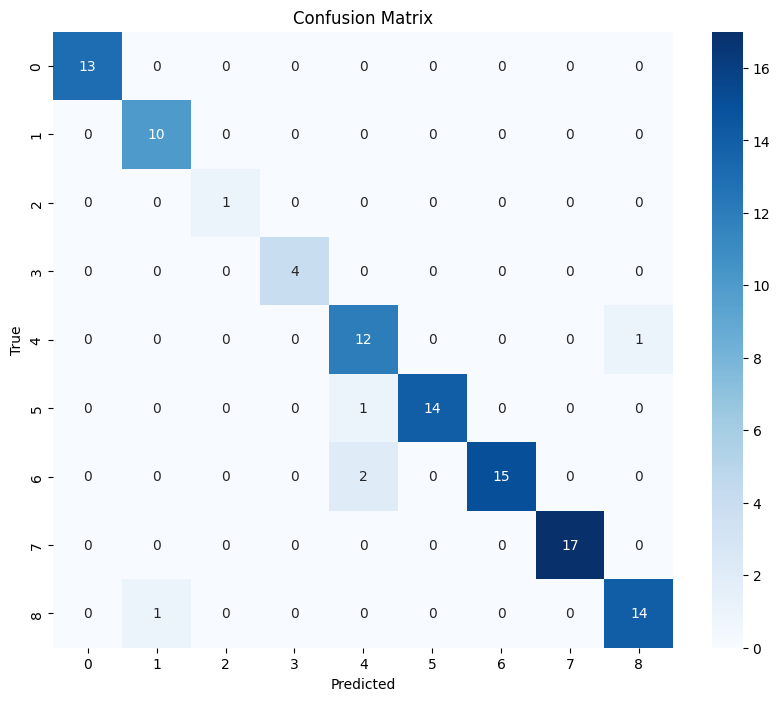

In [51]:
# Calculate confusion matrix
cm = confusion_matrix(all_true_labels, all_predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Testing

In [3]:
import cv2

In [6]:
buildings = os.listdir("dataset")

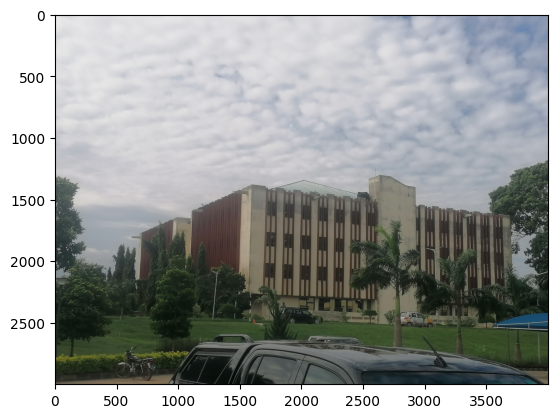

In [8]:
img = cv2.imread("test\\sam2.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

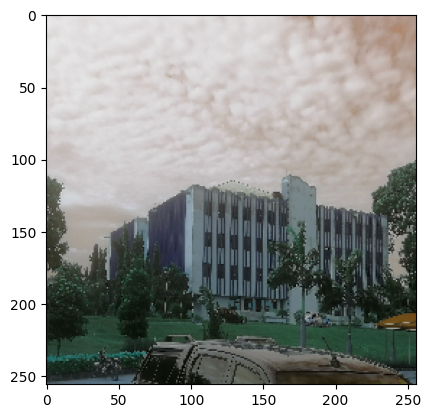

In [9]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
prediction = model.predict(np.expand_dims(resize/255, 0))

In [131]:
index = np.argmax(prediction)
print(f'Predicted class: {index}')
print(f'Predicted Building: {buildings[index]}')

Predicted class: 7
Predicted Building: sam_jonah


In [ ]:
"""
    CLASS 0 = Administration
    ----------------------------------------CLASS 1 = Amissah Arthur
    CLASS 1 = School of Bussiness
    ----------------------------------------CLASS 3 = CALC
    CLASS 2 = CODE
    -------------------------------------------CLASS 5 = College of Education and MIS
    CLASS 3 = Educational Institution
    CLASS 4 = Engineering block
    -------------------------------CLASS 8 = G-Block
    CLASS 5 = Graduate Studies
    ----------------------------------------------CLASS 9 = NEC
    ------------------------------------------CLASS 11 = NEC
    CLASS 6 = NLT
    CLASS 7 = Sam Jonah
    -------------------------------------------CLASS 14 = Science building
    -------------------------------------------CLASS  = Shuttle Stop/Station
    CLASS 8 = SWLT- Shata Wale
"""

In [ ]:
model.save("perfect_nav_model.h5")

Convert model into TensorFlow Lite for mobile devices

In [ ]:
# Load the Keras model
model = tf.keras.models.load_model('perfect_nav_model.h5')

# Convert the model to TensorFlow Lite format with optimizations
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('perfect_nav_model.tflite', 'wb') as f:
    f.write(tflite_model)
